In [0]:
%config IPCompleter.greedy=True

In [2]:
%tensorflow_version 1.x
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
print(tf.__version__)
print(keras.__version__)

TensorFlow 1.x selected.


Using TensorFlow backend.


1.15.2
2.3.1


In [0]:
from keras import backend as K

def reset_tf_session():
  curr_session=tf.get_default_session()
  if curr_session is not None:
    curr_session.close()
  K.clear_session()
  config=tf.ConfigProto()
  config.gpu_options.allow_growth=True
  s=tf.InteractiveSession(config=config)
  K.set_session(s)
  return s

In [0]:
def load_dataset(flatten=False):
  (X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()
  X_train=X_train.astype(float)/255.
  X_test=X_test.astype(float)/255.
  X_train,X_val=X_train[:-10000],X_train[-10000:]
  y_train,y_val=y_train[:-10000],y_train[-10000:]
  if flatten:
    X_train=X_train.reshape([X_train.shape[0],-1])
    X_val=X_val.reshape([X_val.shape[0],-1])
    X_test=X_test.reshape([X_test.shape[0],-1])
  return X_train,y_train,X_val,y_val,X_test,y_test

def load_dataset_from_file(flatten=False):
  (X_train,y_train),(X_test,y_test)=load_data()
  X_train=X_train.astype(float)/255.
  X_test=X_test.astype(float)/255.
  X_train,X_val=X_train[:-10000],X_train[-10000:]
  y_train,y_val=y_train[:-10000],y_train[-10000:]
  if flatten:
    X_train=X_train.reshape([X_train[0],-1])
    X_val=X_val.reshape([X_val.shape[0],-1])
    X_test=X_test.reshape([X_test.shape[0],-1])
  return X_train,y_train,X_test,y_test,X_val,y_val

def load_data(path='mnist.npz'):
  with np.load(path) as f:
    x_train,y_train=f['x_train'],f['y_train']
    x_test,y_test=f['x_test'],f['y_test']
  return (x_train,y_train),(x_test,y_test)

In [0]:
import numpy as np
def sum_sin(N):
  return np.sum(np.arange(N)**2)

In [6]:
%%time
sum_sin(10**5)

CPU times: user 0 ns, sys: 1.93 ms, total: 1.93 ms
Wall time: 6.72 ms


333328333350000

In [0]:
s=reset_tf_session()

In [0]:
N=tf.placeholder('int64',name='input_to_your_function')
result=tf.reduce_sum(tf.range(N)**2)

In [9]:
result

<tf.Tensor 'Sum:0' shape=() dtype=int64>

In [10]:
%%time
result.eval({N:10**5})

CPU times: user 383 ms, sys: 226 ms, total: 609 ms
Wall time: 6.16 s


333328333350000

In [0]:
writer=tf.summary.FileWriter('tmp/tboard',graph=s.graph)

In [0]:
with tf.name_scope('Placeholders_examples'):
  arbitrary_input=tf.placeholder('float32')
  input_vector=tf.placeholder('float32',shape=(None,))
  fixed_vector=tf.placeholder('int32',shape=(10,))
  input_matrix=tf.placeholder('float32',shape=(None,15))
  input1=tf.placeholder('float64',shape=(None,100,None))
  input2=tf.placeholder('int32',shape=(None,None,3,224,224))
  double_the_vector=input_vector**2
  elementwise_cosine=tf.cos(input_vector)
  vector_squares=input_vector**2-input_vector+1

In [0]:
my_vector=tf.placeholder('float32',shape=(None,),name='VECTOR_1')
my_vector2=tf.placeholder('float32',shape=(None,))
my_transformation=my_vector*my_vector2/(tf.sin(my_vector)+1)

In [14]:
print(my_transformation)

Tensor("truediv:0", shape=(?,), dtype=float32)


In [15]:
dummy=np.arange(5).astype('float32')
print(dummy)
my_transformation.eval({my_vector:dummy,my_vector2:dummy[::-1]})

[0. 1. 2. 3. 4.]


array([0.       , 1.6291324, 2.0950115, 2.6289961, 0.       ],
      dtype=float32)

In [0]:
writer.add_graph(my_transformation.graph)
writer.flush()

In [0]:
with tf.name_scope('MSE'):
  y_true=tf.placeholder('float32',shape=(None,),name='y_true')
  y_predicted=tf.placeholder('float32',shape=(None,),name='y_predicted')
  mse=tf.reduce_mean((y_true-y_predicted)**2)

def compute_mse(vector1,vector2):
  return mse.eval({y_true:vector1,y_predicted:vector2})

In [0]:
writer.add_graph(mse.graph)
writer.flush()

In [0]:
shared_vector_1=tf.Variable(initial_value=np.ones(5),
                            name='example_variable')

In [20]:
shared_vector_1

<tf.Variable 'example_variable:0' shape=(5,) dtype=float64_ref>

In [21]:
s.run(tf.global_variables_initializer())
print('Initial value',s.run(shared_vector_1))

Initial value [1. 1. 1. 1. 1.]


In [22]:
s.run(shared_vector_1.assign(np.arange(5)))
print('New value',s.run(shared_vector_1))

New value [0. 1. 2. 3. 4.]


In [23]:
my_scalar=tf.placeholder('float32')
scalar_squared=my_scalar**2
derivative=tf.gradients(scalar_squared,[my_scalar])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [24]:
derivative

[<tf.Tensor 'gradients/pow_1_grad/Reshape:0' shape=<unknown> dtype=float32>]

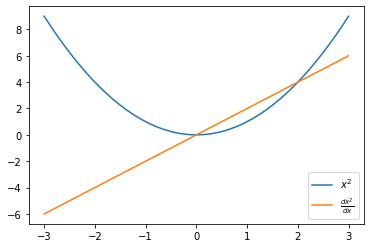

In [25]:
x=np.linspace(-3,3)
x_squared,x_squared_der=s.run([scalar_squared,derivative[0]],
                              {my_scalar:x})
plt.plot(x,x_squared,label='$x^2$')
plt.plot(x,x_squared_der,label=r'$\frac{dx^2}{dx}$')
plt.legend()

In [0]:
my_vector=tf.placeholder('float32',[None])
weird_psychotic_function = tf.reduce_mean(
    (my_vector+my_scalar)**(1+tf.nn.moments(my_vector,[0])[1]) + 
    1./ tf.atan(my_scalar))/(my_scalar**2 + 1) + 0.01*tf.sin(
    2*my_scalar**1.5)*(tf.reduce_sum(my_vector)* my_scalar**2
                      )*tf.exp((my_scalar-4)**2)/(
    1+tf.exp((my_scalar-4)**2))*(1.-(tf.exp(-(my_scalar-4)**2)
                                    )/(1+tf.exp(-(my_scalar-4)**2)))**2

der_by_scalar=tf.gradients(weird_psychotic_function,my_scalar)
der_by_vector=tf.gradients(weird_psychotic_function,my_vector)

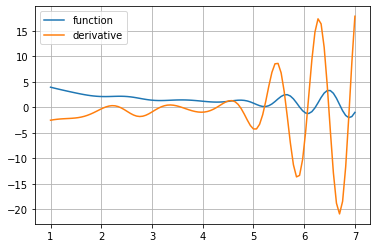

In [27]:
scalar_space=np.linspace(1,7,100)
y=[s.run(weird_psychotic_function,{my_scalar:x,
                                  my_vector:[1,2,3]}) for x in 
                                  scalar_space]
plt.plot(scalar_space,y,label='function')
y_der_by_scalar=[s.run(der_by_scalar[0],{my_scalar:x,
                                     my_vector:[1,2,3]}) for x in 
                 scalar_space]
plt.plot(scalar_space,y_der_by_scalar,label='derivative')
plt.grid()
plt.legend()

In [0]:
y_guess=tf.Variable(np.zeros(2,dtype='float32'))
y_true=tf.range(1,3,dtype='float32')
loss=tf.reduce_mean((y_guess-y_true)**2)
optimizer=tf.train.MomentumOptimizer(0.01,0.5).minimize(loss,
                                                        var_list=y_guess)

In [29]:
from sklearn.datasets import load_digits
mnist=load_digits(2)
X,y=mnist.data,mnist.target
print('y [shape - %s]:'%(str(y.shape)),y[:10])
print('x [shape - %s]:'%(str(X.shape)))

y [shape - (360,)]: [0 1 0 1 0 1 0 0 1 1]
x [shape - (360, 64)]:


X:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.]
 [ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0.]]
y:
 [0 1 0 1 0 1 0 0 1 1]


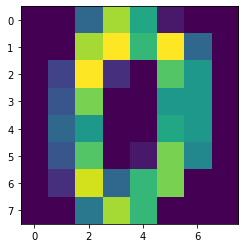

In [30]:
print('X:\n',X[:3,:10])
print('y:\n',y[:10])
plt.imshow(X[0].reshape([8,8]));

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [101]:
X_train.shape

(270, 64)

In [0]:
weights=tf.Variable(initial_value=np.random.random((X.shape[1],1)),
                    dtype='float32',name='weights')
b=tf.Variable(initial_value=np.random.random(1)[0],
              dtype='float32',name='b')

In [0]:
input_X=tf.placeholder('float32',shape=(None,64))
input_y=tf.placeholder('float32',shape=(None,))

In [0]:
logits=tf.squeeze(tf.matmul(input_X,weights)+b)
predicted_y=tf.sigmoid(logits)
loss=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=input_y,
                                                    logits=logits))
optimizer=tf.train.AdamOptimizer(0.1).minimize(loss)

In [132]:
validation_weights=1e-3*np.fromiter(map(lambda x:
s.run(weird_psychotic_function,{my_scalar:x,my_vector:[1,0.1,2]}),
      0.15*np.arange(1,X.shape[1]+1)),
      count=X.shape[1],dtype=np.float32)[:,np.newaxis]
prediction_validation=s.run(predicted_y,{input_X:X,
                                         weights:validation_weights,
                                         b:1e-1})
validation_true_values=np.loadtxt('/content/validation_predictons.txt')
assert prediction_validation.shape==(X.shape[0],),\
'Prediction must be a 1D array with length equal tothe number of \
examples in input_X'
loss_validation=s.run(loss,{input_X:X[:100],
                            input_y:y[-100:],
                            weights:validation_weights+1.21e-3,
                            b:-1e-1})
print(loss_validation)
assert np.allclose(loss_validation,0.728689)

0.72868866


In [135]:
from IPython import display
import time

from sklearn.metrics import roc_auc_score
s.run(tf.global_variables_initializer())
for i in range(20):
  s.run(optimizer,{input_X:X_train,input_y:y_train})
  loss_i=s.run(loss,{input_X:X_train,input_y:y_train})
  print('loss at iter %i:%.4f'%(i,loss_i))
  print('train acu:',roc_auc_score(y_train,
                                   s.run(predicted_y,
                                         {input_X:X_train})))
  print('test auc:',roc_auc_score(y_test,s.run(predicted_y,
                                              {input_X:X_test})))
  #display.clear_output(wait=True)  
  #time.sleep(0.5)

loss at iter 0:59.8168
train acu: 0.5
test auc: 0.5
loss at iter 1:44.2250
train acu: 0.5
test auc: 0.5
loss at iter 2:28.6333
train acu: 0.4963768115942029
test auc: 0.5
loss at iter 3:13.0735
train acu: 0.0659310496267018
test auc: 0.06101778656126482
loss at iter 4:9.0931
train acu: 0.04199604743083003
test auc: 0.02495059288537549
loss at iter 5:13.8005
train acu: 0.4914086517347387
test auc: 0.48937747035573126
loss at iter 6:14.4542
train acu: 0.5362318840579711
test auc: 0.5340909090909091
loss at iter 7:12.1546
train acu: 0.605072463768116
test auc: 0.5909090909090909
loss at iter 8:7.7882
train acu: 0.8043478260869565
test auc: 0.8181818181818181
loss at iter 9:2.9091
train acu: 0.9528985507246377
test auc: 0.9545454545454546
loss at iter 10:0.5315
train acu: 0.9963768115942029
test auc: 1.0
loss at iter 11:0.0810
train acu: 0.9999451032059727
test auc: 1.0
loss at iter 12:0.0105
train acu: 1.0
test auc: 1.0
loss at iter 13:0.0292
train acu: 1.0
test auc: 1.0
loss at iter 14:0

In [0]:
%load_ext tensorboard

In [0]:
%tensorboard --logdir tmp/tboard